In [1]:
"""
This code does the same things as the Euler.ipynb, with the only difference being that this one uses the more advanced and efficient
Runge-Kutta integrator. In order to implement this method efficiently, it's best to switch over to numpy vectors completely, instead of
projecting all equations on x,y,z coordinates and solving separately.

Other than that, the data analysis section is mostly the same, so, if you want to find a more detailed explanation about a certain cell,
refer to the Euler.ipynb notebook.
"""

"\nThis code does the same things as the Euler.ipynb, with the only difference being that this one uses the more advanced and efficient\nRunge-Kutta integrator. In order to implement this method efficiently, it's best to switch over to numpy vectors completely, instead of\nprojecting all equations on x,y,z coordinates and solving separately.\n\nOther than that, the data analysis section is mostly the same, so, if you want to find a more detailed explanation about a certain cell,\nrefer to the Euler.ipynb notebook.\n"

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

G = 6.67e-11         #Gravitational constant

#Throughout the simulation, we will want to calculate and update the x,y,z,vx,vy,vz values of each body, so it's good to
#define a class with the given values
class body:
    def __init__(self, m, x, y, z, vx, vy, vz):
        self.m = m
        self.x = x
        self.y = y
        self.z = z
        self.vx = vx
        self.vy = vy
        self.vz = vz

#We will also commonly need to calculate the distance between two bodies, given their x,y and z coordinates:
def distance(x1, x2, y1, y2, z1, z2):
    return ((x1 - x2)**2 + (y1 - y2)**2 + (z1 - z2)**2)**(0.5)

#This function will make tick labels on graphs shorter and prettier
def custom_formatter(value, _):
    return "{:.2e}".format(value)

#-------------------------------------------------------------------------------------------

T = 86400*365*1e8       #Simulation end time in seconds, 1day = 86400s
t = 0                #Simulation start time, most commonly zero
dt = 864000*1e8           #Time step, smaller values give higher accuracy but longer computation time

Minit, Xinit, Yinit, Zinit, VXinit, VYinit, VZinit = np.loadtxt('galaxy.txt', unpack=True)   #Initial conditions from file

N = len(Minit) #Number of bodies in simulation

MASSES = []
POS = np.zeros((N,3))
VEL = np.zeros((N,3))
for i in range(len(Minit)):
    MASSES.append(Minit[i]*2e30)
    POS[i] = [Xinit[i]*3.028e22,Yinit[i]*3.028e22,Zinit[i]*3.028e22]
    VEL[i] = [VXinit[i]*1e5,VYinit[i]*1e5,VZinit[i]*1e5]

ACC = np.zeros_like(POS)

X = []
Y = []
Z = []
TIME = []        #List for storing time values
U = []           #List for the total potential energy over time
K = []           #List for the total kinetic energy over time
E = []           #List for the total energy over time

print('done')

done


0.0
2.73972602739726
5.47945205479452
8.219178082191782
10.95890410958904
13.698630136986301
16.438356164383563
19.17808219178082
21.91780821917808
24.65753424657534
27.397260273972602
30.136986301369863
32.87671232876713
35.61643835616438
38.35616438356164
41.0958904109589
43.83561643835616
46.57534246575342
49.31506849315068
52.054794520547944
54.794520547945204
57.534246575342465
60.273972602739725
63.013698630136986
65.75342465753425
68.4931506849315
71.23287671232876
73.97260273972603
76.71232876712328
79.45205479452055
82.1917808219178
84.93150684931507
87.67123287671232
90.41095890410959
93.15068493150685
95.89041095890411
98.63013698630137


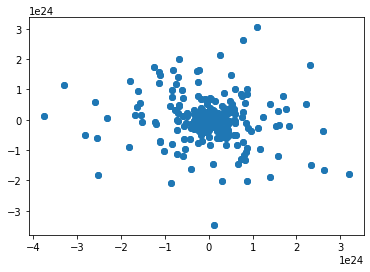

In [3]:
def acc(pos, mass):
    ACCELERATIONS_local = np.zeros_like(pos)
    for i in range(N):
        for j in range(N):
            if i != j:
                r = pos[i] - pos[j]
                ACCELERATIONS_local[i] += G * mass[j] * r / np.linalg.norm(r)**3

    return ACCELERATIONS_local



while t<=T:
    
    k1v = dt * acc(POS, MASSES)
    k1x = dt * VEL
    
    k2v = dt * acc(POS + k1x / 2, MASSES)
    k2x = dt * (VEL + k1v / 2)
    
    k3v = dt * acc(POS + k2x / 2, MASSES)
    k3x = dt * (VEL + k2v / 2)
    
    k4v = dt * acc(POS + k3x, MASSES)
    k4x = dt * (VEL + k3v)

    VEL += (k1v + 2*k2v + 2*k3v + k4v) / 6
    POS += (k1x + 2*k2x + 2*k3x + k4x) / 6


    print(t*100/T) #Real-time feed on how far the simulation has progressed, given in percentages
    t+=dt
    TIME.append(t)

    if (t+dt)>T:
        for i in range(N):
            X.append(POS[i,0])
            Y.append(POS[i,1])
            Z.append(POS[i,2])

plt.scatter(X,Y)
plt.show()


In [4]:
"""
Now we move on to analyzing some of the data we've collected in the previous block of code. The first thing we're interested in when
analyzing galaxies and similar gravitationally-bound systems is their stability, and this is best done by looking at the energy plot
over time
"""

"\nNow we move on to analyzing some of the data we've collected in the previous block of code. The first thing we're interested in when\nanalyzing galaxies and similar gravitationally-bound systems is their stability, and this is best done by looking at the energy plot\nover time\n"

ValueError: x and y must have same first dimension, but have shapes (37,) and (0,)

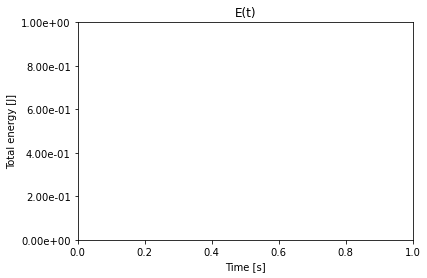

In [5]:
plt.gca().yaxis.set_major_formatter(FuncFormatter(custom_formatter))  #Makes y axis numbers look prettier

plt.title('E(t)')
plt.xlabel('Time [s]')
plt.ylabel('Total energy [J]')
plt.plot(TIME,E)
plt.show()

In [ ]:
#We can see that the energy is conserved, even over ~Gyr periods, which is good.

#Next, we can take a look at the potential and kinetic energies individually

In [ ]:
plt.gca().yaxis.set_major_formatter(FuncFormatter(custom_formatter)) 

plt.title('E_k(t)')
plt.xlabel('Time [s]')
plt.ylabel('Total kinetic energy [J]')
plt.plot(TIME,K)
plt.show()

plt.clf()

plt.gca().yaxis.set_major_formatter(FuncFormatter(custom_formatter))  

plt.title('U(t)')
plt.xlabel('Time [s]')
plt.ylabel('Total potential energy [J]')
plt.plot(TIME,U)
plt.show()

In [ ]:
"""
Here we see some important information. Firstly, the kinetic energy is more stable than the potential energy.
It might seem like kinetic energy is the exact same value over all time, but if you print its value during each time step in the main cell,
you will see that's not the case. It's just that the change is too small to be visible on the graph. On the other hand, the potential energy
is less stable, which is actually expected.

The reason for that is that the kinetic energy scales with the velocity (~v^2), whereas the potential energy scales primarily with position
(~1/r). During the evolution of this galaxy, we expect its constituents to move around at all times, drastically changing their positions
over time. On the other hand, most of its particles should be in relatively stable rotation around the center of mass, leading to very
small changes in velocity over time. Even so, during the ~10Gyr simulation time, the total potential energy never changed more than a few
percent, which, for a toy model galaxy with just 400 particles, is a good result.
"""

In [ ]:
"""
Now, we might want to look closer into the morphology of this galaxy. For starters, we could try something like a 3D plot of
all particles' positions
"""

In [ ]:
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.scatter3D(X, Y, Z)
plt.show()

In [ ]:
"""
This gives us a general glimpse into how this galaxy looks like, but it gives us no quantifiable data. For this purpose, we want to
analyze a density plot. For this, we first need to find the center of mass, move our coordinate system so its origin is the center of mass,
and then calculate the density of concentric thin shells around the center of mass, with increasing radius.
"""

In [ ]:
comx = 0 #Initialize center of mass
comy = 0
comz = 0

#Total mass of the system calculation
M = 0
for i in range(N):
    M+=BODIES[i].m

for i in range(N):
    comx += BODIES[i].x*BODIES[i].m/M
    comy += BODIES[i].y*BODIES[i].m/M
    comz += BODIES[i].z*BODIES[i].m/M


#Let's see where the center of mass is on the upper plot
print(comx, comy, comz)

fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.scatter3D(X, Y, Z)
ax.scatter3D(comx, comy,comz, color='red')
plt.show()

In [ ]:
#As we can see from the plot and the printed coordinates, the COM is somewhere near the main cluster of particles, as expected.
#Let's see in more detail on 2D plots

plt.title('X-Y plane')
plt.scatter(X,Y)
plt.scatter(comx,comy, color='red')
plt.show()

plt.title('X-Z plane')
plt.scatter(X,Z)
plt.scatter(comx,comz, color='red')
plt.show()

plt.title('Y-Z plane')
plt.scatter(Y,Z)
plt.scatter(comy,comz, color='red')
plt.show()

In [ ]:
#Everything seems to be in order, so we can move on to building the density profile
#We first move the entire system so that the center of mass is in the r=0 point

for i in range(N):
    BODIES[i].x -= comx
    BODIES[i].y -= comy
    BODIES[i].z -= comz



In [ ]:
RADII = []
DENSITIES = []

r = 1e8
dr = 1e21

#Go in expanding concentric spherical shells around the center of mass
while r<5e24:

    #Calculate total mass within given shell
    mass = 0
    for i in range(N):
        #If a particle is within [r, r+dr]
        if distance(BODIES[i].x, 0, BODIES[i].y, 0, BODIES[i].z, 0)<= r+dr and distance(BODIES[i].x, 0, BODIES[i].y, 0, BODIES[i].z, 0)> r:
            mass+=BODIES[i].m

    volume = 4*3.1415*r*r*dr #Volume of given shell
    density = mass/volume #Density within [r, r+dr]
    if mass != 0:
        RADII.append(r)
        DENSITIES.append(density)

    r+=dr


plt.title('Density profile of our mock galaxy')
plt.plot(RADII, DENSITIES)
plt.xlim(0, 5e23)
plt.show()

plt.clf()

plt.title('Logarithmic plot of the same density profile')
plt.plot(RADII, DENSITIES)
plt.yscale('log')
plt.show()    

In [ ]:
"""
The 'coarsness' of these plots is due to the low number of bodies in our test galaxy. Many of the shells that we iterated over had
no particles in them at all. I have removed those dots from the plots for clarity, but this means that we can't have smooth graphs.

In order to create a galaxy with a smooth density plot, we'd need to have upwards of 500 thousand particles in it, which isn't practical
for the purposes of this excercise.

As a final touch before we wrap up, we can generate a heatmap of our galaxy. Since there's a small amount of particles in it, the
resolution won't be very satisfying. However, it's still good practice, as heatmaps can often provide insightful information about the
structure of a galaxy, or even the possible formation of substructures within it (shells, streams, globular clusters etc).
"""

In [ ]:
plt.hexbin(X, Y, gridsize=50, cmap='viridis', mincnt=1)
plt.colorbar(label='Density')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('X-Y density heatmap')
plt.show()

plt.clf()

plt.hexbin(X, Y, gridsize=300, cmap='viridis', mincnt=1)
plt.colorbar(label='Density')
plt.xlabel('X-axis')
plt.xlim(-5e23, 5e23)
plt.ylim(-5e23, 5e23)
plt.ylabel('Y-axis')
plt.title('X-Y density heatmap (zoomed in)')
plt.show()